In [1]:
#Este dataset contém dados de aprovações de cartão de credito
#O objetivo é fazer a estruturação, analise e predição de aprovação no cartão de credito
#O dataset escolhido se encontra em https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data/code

#De acordo com a matéria https://www.sebrae.com.br/sites/PortalSebrae/credito-principais-pontos-analisados-pelos-bancos-na-hora-de-aprovar,678f1b97904a1710VgnVCM1000004c00210aRCRD
#Os principais pontos analisados na aprovação no banco são:
#1.Capacidade de pagamento: Os bancos verificam os fluxos e as projeções de caixa, para analisar se a empresa tem capacidade de honrar os compromissos assumidos
#2.Capital: As instituições financeiras analisam os índices de liquidez, lucratividade e rentabilidade da empresa e verificam se elas têm reservas suficientes para arcar com o pagamento do crédito.
#3.Caratér: Nesse ponto é analisado o histórico do cliente como tomador de crédito.
#4.Garantia: O banco analisa as garantias oferecidas na hora do empréstimo.
#5.Coletivo: Empresas que atuam junto com outras do mesmo setor, mas em etapas diferentes da cadeia de produção, podem se tornar fornecedoras nesse meio, e por isso têm um menor diferencial de risco.

#Com isso será analisado o dataset para decidir a melhor forma de fazer a estruturação, analise e predição dos dados.

In [2]:
#Importação das bibliotecas a serem utilizadas
import pandas as pd # Pacote para exploração e análise de dados
import numpy  as np # Pacote com métodos numéricos e representações matriciais
import sklearn as sk # Pacotes do scikit-learn para pré-processamento de dados
import seaborn as sns #Pacotes que fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos
import matplotlib.pyplot as plt #uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python

In [3]:
#Armazenamento do arquivo e leitura das 5 primeiras linhas
data=pd.read_csv(r'C:\Users\erine\Desktop\Matheus\archive\clean_dataset.csv')
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [4]:
#Quantidade de Colunas e linhas
data.shape

(690, 16)

In [5]:
#Analise dos valores nas coluna Gender (Genero)
data['Gender'].value_counts()

1    480
0    210
Name: Gender, dtype: int64

In [6]:
#Analise dos valores nas coluna Age (Idade)
data['Age'].value_counts()

28.46    12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: Age, Length: 350, dtype: int64

In [7]:
#Analise dos valores nas coluna Debt (Debito)
data['Debt'].value_counts()

1.500     21
0.000     19
3.000     19
2.500     19
0.750     16
          ..
0.085      1
12.250     1
11.045     1
11.125     1
3.375      1
Name: Debt, Length: 215, dtype: int64

In [8]:
#Analise dos valores nas coluna Married (Casado(a))
data['Married'].value_counts()

1    525
0    165
Name: Married, dtype: int64

In [9]:
#Analise dos valores nas coluna BankCustomer (cliente do banco)
data['BankCustomer'].value_counts()

1    527
0    163
Name: BankCustomer, dtype: int64

In [10]:
#Analise dos valores nas coluna Industry (Industria) 
data['Industry'].value_counts()

Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64

In [11]:
#Analise dos valores nas coluna Ethnicity (Etinia) 
data['Ethnicity'].value_counts()

White     408
Black     138
Asian      59
Latino     57
Other      28
Name: Ethnicity, dtype: int64

In [12]:
#Analise dos valores nas coluna YearsEmployed (YearsEmployed)
data['YearsEmployed'].value_counts()

0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
4.165     1
9.000     1
1.960     1
5.125     1
8.290     1
Name: YearsEmployed, Length: 132, dtype: int64

In [13]:
#Analise dos valores nas coluna PriorDefault (Genero)
data['PriorDefault'].value_counts()

1    361
0    329
Name: PriorDefault, dtype: int64

In [14]:
#Analise dos valores nas coluna Citizen (Cidadão) 
data['Citizen'].value_counts()

ByBirth         625
ByOtherMeans     57
Temporary         8
Name: Citizen, dtype: int64

In [15]:
#Analise dos valores nas coluna CreditScore (Pontuação de credito) 
data['CreditScore'].value_counts()

0     395
1      71
2      45
3      28
6      23
11     19
5      18
7      16
4      15
9      10
8      10
10      8
14      8
12      8
15      4
16      3
20      2
17      2
23      1
40      1
67      1
13      1
19      1
Name: CreditScore, dtype: int64

In [16]:
#Analise dos valores nas coluna DriversLicense (Licença para dirigir) 
data['DriversLicense'].value_counts()

0    374
1    316
Name: DriversLicense, dtype: int64

In [17]:
#Analise dos valores nas coluna Employed (Empregado) 
data['Employed'].value_counts()

0    395
1    295
Name: Employed, dtype: int64

In [18]:
#Analise dos valores nas coluna Income (renda) 
data['Income'].value_counts()


0       295
1        29
500      10
1000     10
2         9
       ... 
1704      1
857       1
6700      1
2503      1
750       1
Name: Income, Length: 240, dtype: int64

In [19]:
#Analise dos valores nas coluna ZipCode (Código postal) 
data['ZipCode'].value_counts()

0      145
120     35
200     35
160     34
100     30
      ... 
21       1
393      1
395      1
93       1
256      1
Name: ZipCode, Length: 170, dtype: int64

In [20]:
#Analise dos valores nas coluna Approved (Aprovado) 
data['Approved'].value_counts()

0    383
1    307
Name: Approved, dtype: int64

In [21]:
#Observa-se que todas as colunas exceto ZipCode tem o codigo postal correto e não há valores nulos em nenhuma coluna
data.info

<bound method DataFrame.info of      Gender    Age    Debt  Married  BankCustomer         Industry Ethnicity  \
0         1  30.83   0.000        1             1      Industrials     White   
1         0  58.67   4.460        1             1        Materials     Black   
2         0  24.50   0.500        1             1        Materials     Black   
3         1  27.83   1.540        1             1      Industrials     White   
4         1  20.17   5.625        1             1      Industrials     White   
..      ...    ...     ...      ...           ...              ...       ...   
685       1  21.08  10.085        0             0        Education     Black   
686       0  22.67   0.750        1             1           Energy     White   
687       0  25.25  13.500        0             0       Healthcare    Latino   
688       1  17.92   0.205        1             1  ConsumerStaples     White   
689       1  35.00   3.375        1             1           Energy     Black   

     Ye

In [22]:
#Cria-se outra coluna para definir o ano que iniciou-se a trabalhar
data['WorkStartAge'] = data['Age'] - data['YearsEmployed']
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,WorkStartAge
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1,29.58
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1,55.63
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1,23.00
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1,24.08
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1,18.46


In [23]:
#Criação de um dataframe codificado por rotulo
contin_var = data.drop(columns = ['Industry', 'Ethnicity','Citizen'])
cate_var = data[['Industry', 'Ethnicity','Citizen']]
cols = cate_var.columns

In [24]:
from sklearn.preprocessing import LabelEncoder #transformar rótulos não numéricos em rótulos numéricos.
lb = LabelEncoder()
for col in cate_var[cols]:
    cate_var[col] = lb.fit_transform(cate_var[col])

C:\Users\erine\AppData\Local\Temp\ipykernel_9436\4283701000.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_var[col] = lb.fit_transform(cate_var[col])


In [25]:
contin_var.reset_index(drop = True, inplace=True)
cate_var.reset_index(drop = True, inplace=True)
data_concat = pd.concat([contin_var,cate_var], axis = 1)
#Retirar Coluna ZipCode
data_concat=data_concat.drop(columns=['ZipCode'])
data_concat.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved,WorkStartAge,Industry,Ethnicity,Citizen
0,1,30.83,0.000,1,1,1.25,1,1,1,0,0,1,29.58,7,4,0
1,0,58.67,4.460,1,1,3.04,1,1,6,0,560,1,55.63,9,1,0
2,0,24.50,0.500,1,1,1.50,1,0,0,0,824,1,23.00,9,1,0
3,1,27.83,1.540,1,1,3.75,1,1,5,1,3,1,24.08,7,4,0
4,1,20.17,5.625,1,1,1.71,1,0,0,0,0,1,18.46,7,4,1


In [26]:
data_concat[['Debt','YearsEmployed','Income','WorkStartAge']].describe()

,Debt,YearsEmployed,Income,WorkStartAge
count,690.000000,690.000000,690.000000,690.000000
mean,4.758725,2.223406,1017.385507,29.290710
std,4.978163,3.346513,5210.102598,10.990442
min,0.000000,0.000000,0.000000,8.080000
25%,1.000000,0.165000,0.000000,21.355000
50%,2.750000,1.000000,5.000000,26.540000
75%,7.207500,2.625000,395.500000,34.580000
max,28.000000,28.500000,100000.000000,79.710000


In [27]:
#Analise Visual dos dados utilizando tabelas graficas
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('retina')

C:\Users\erine\AppData\Local\Temp\ipykernel_9436\4246950942.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [28]:
data_concat[['Debt','YearsEmployed','Income','WorkStartAge']].describe()

,Debt,YearsEmployed,Income,WorkStartAge
count,690.000000,690.000000,690.000000,690.000000
mean,4.758725,2.223406,1017.385507,29.290710
std,4.978163,3.346513,5210.102598,10.990442
min,0.000000,0.000000,0.000000,8.080000
25%,1.000000,0.165000,0.000000,21.355000
50%,2.750000,1.000000,5.000000,26.540000
75%,7.207500,2.625000,395.500000,34.580000
max,28.000000,28.500000,100000.000000,79.710000


<Figure size 576x576 with 0 Axes>

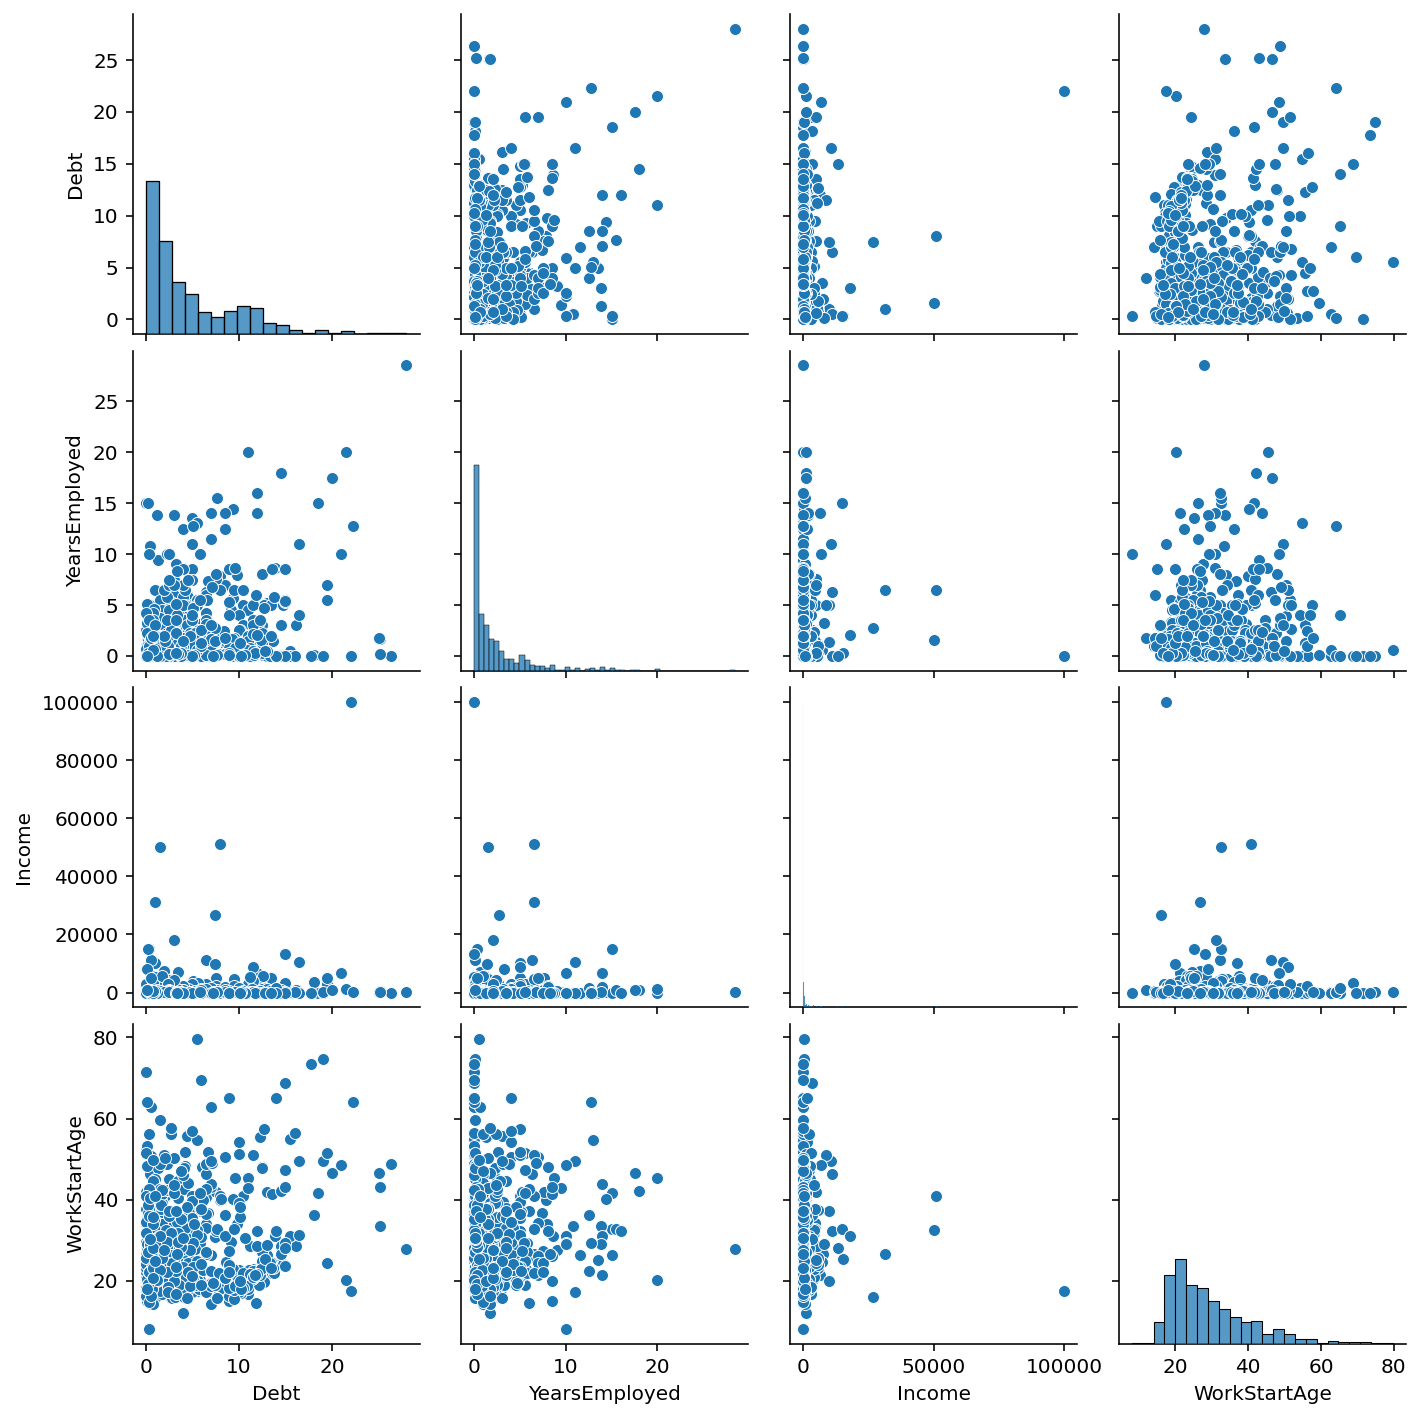

In [29]:
plt.figure(figsize=(8,8))
sns.pairplot(data_concat[['Debt','YearsEmployed','Income','WorkStartAge']])

<AxesSubplot:xlabel='WorkStartAge'>

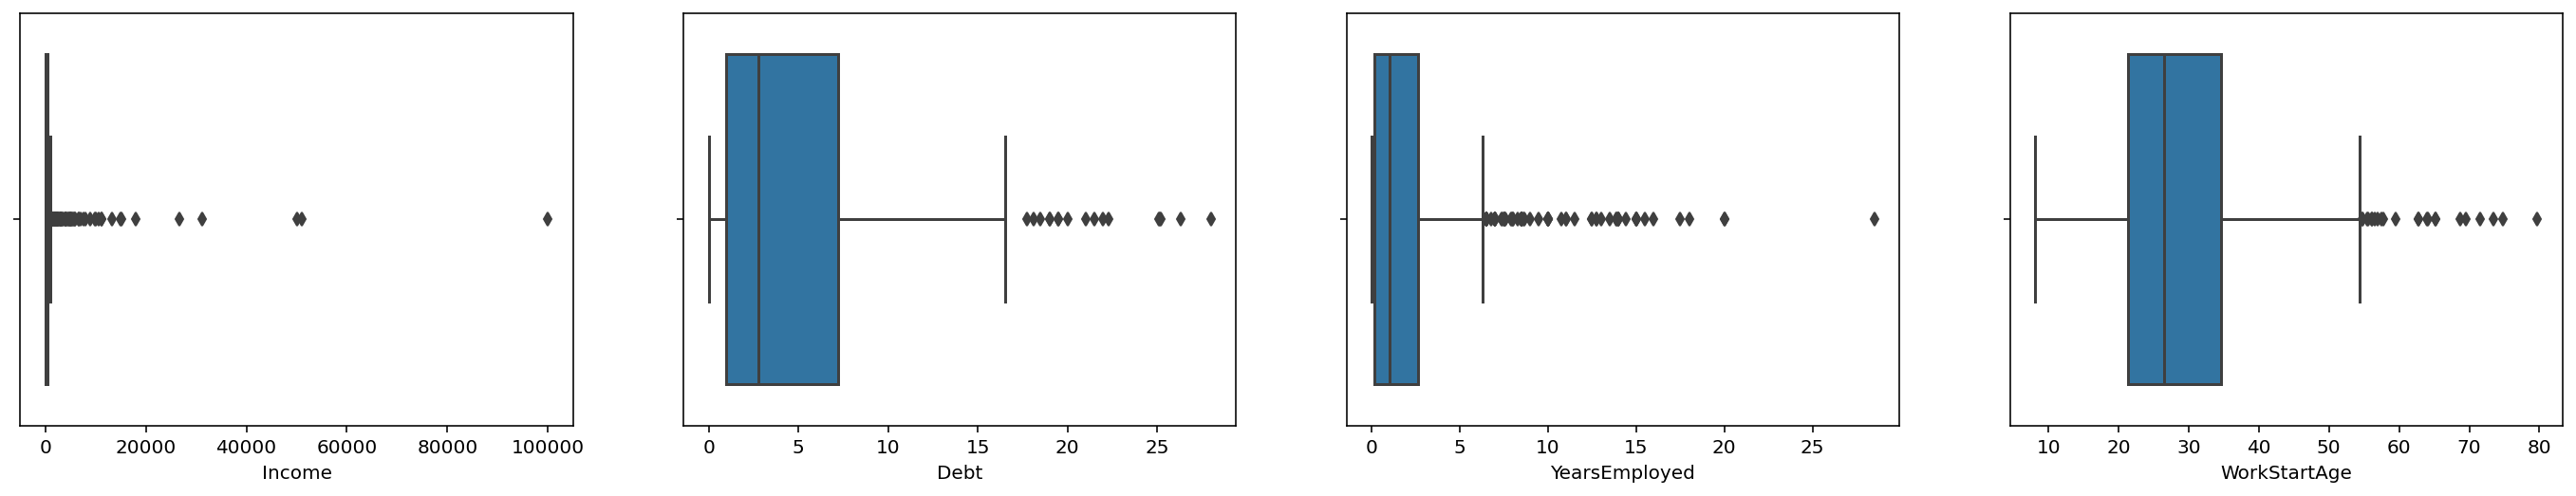

In [30]:
#Observa-se que os valores atipicos afetam bastante a coluna Income
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(24, 4))

sns.boxplot(x=data_concat['Income'],ax=ax1)
sns.boxplot(x=data_concat['Debt'],ax=ax2)
sns.boxplot(x=data_concat['YearsEmployed'],ax=ax3)
sns.boxplot(x=data_concat['WorkStartAge'],ax=ax4)

In [31]:
#Corta-se os resultados dos intervalos de 5% a 95% da coluna Renda
income_cut = sorted(data_concat['Income'])
q1, q2= np.percentile(income_cut,[5,95])
print(q1,q2)

0.0 4119.399999999996


In [32]:
data_concat=data_concat[((data_concat['Income']>=0) & (data_concat['Income']<=4119.399999999996))]
data=data[((data['Income']>=0) & (data['Income']<=4119.399999999996))]

<AxesSubplot:xlabel='Income', ylabel='Debt'>

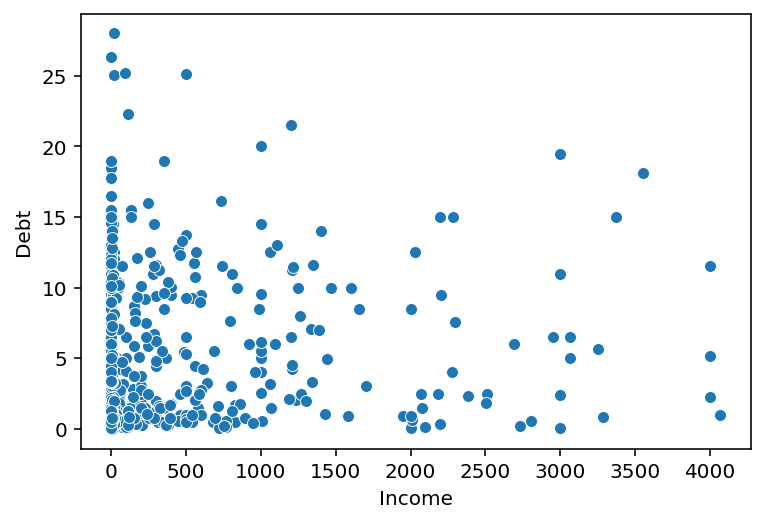

In [33]:
sns.scatterplot(data=data_concat,x='Income',y='Debt')

<AxesSubplot:xlabel='Age', ylabel='WorkStartAge'>

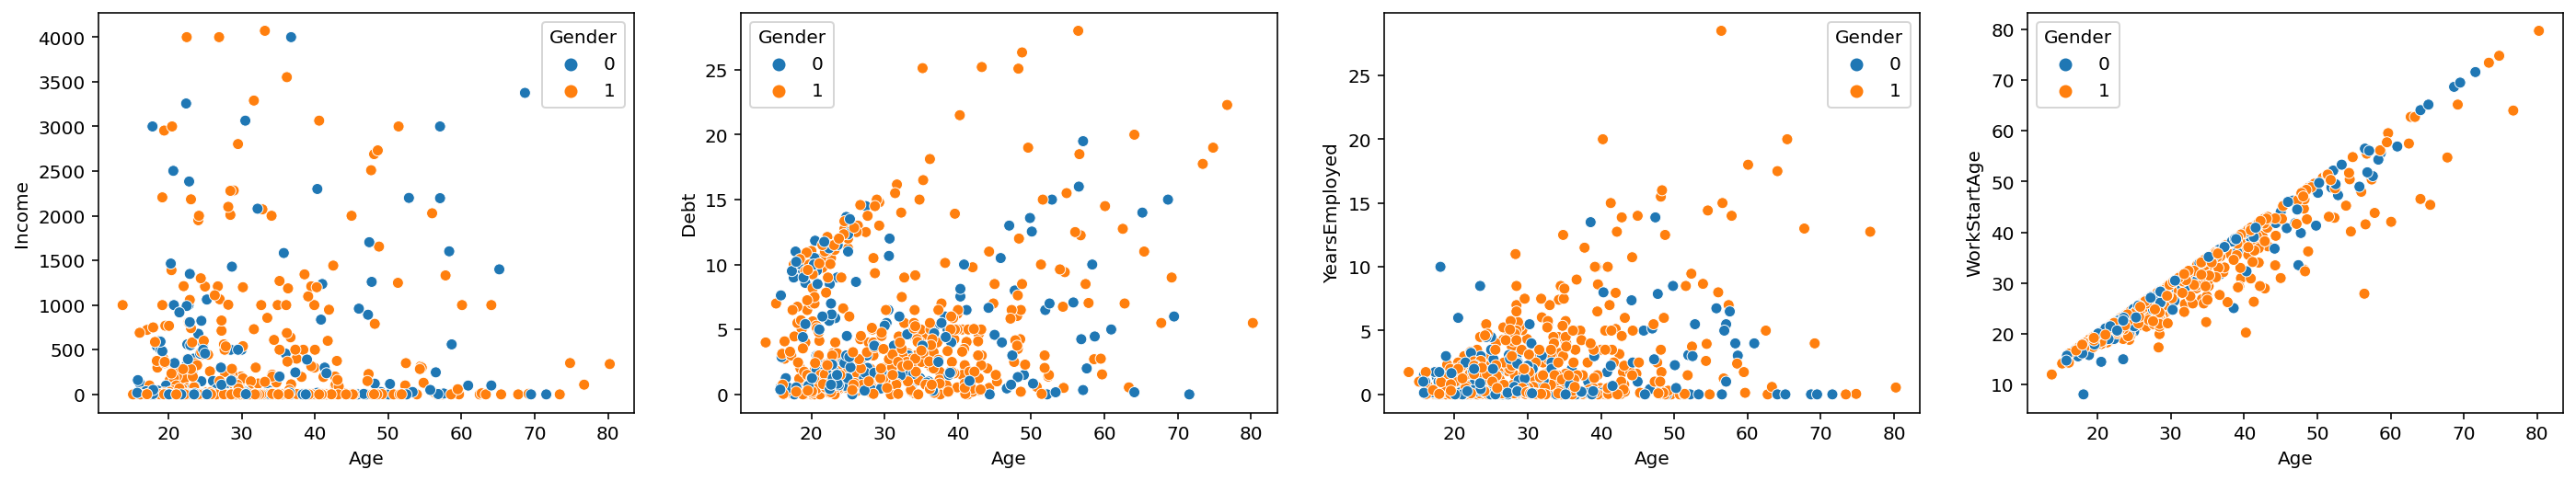

In [34]:
#Analise Grafica relacionando as colunas
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(24, 4))

sns.scatterplot(data=data_concat,x='Age',y='Income', hue='Gender',ax=ax1)
sns.scatterplot(data=data_concat,x='Age',y='Debt', hue='Gender',ax=ax2)
sns.scatterplot(data=data_concat,x='Age',y='YearsEmployed', hue='Gender',ax=ax3)
sns.scatterplot(data=data_concat,x='Age',y='WorkStartAge', hue='Gender',ax=ax4)

[Text(0, 0, '28.1822'), Text(0, 0, '29.7226')]

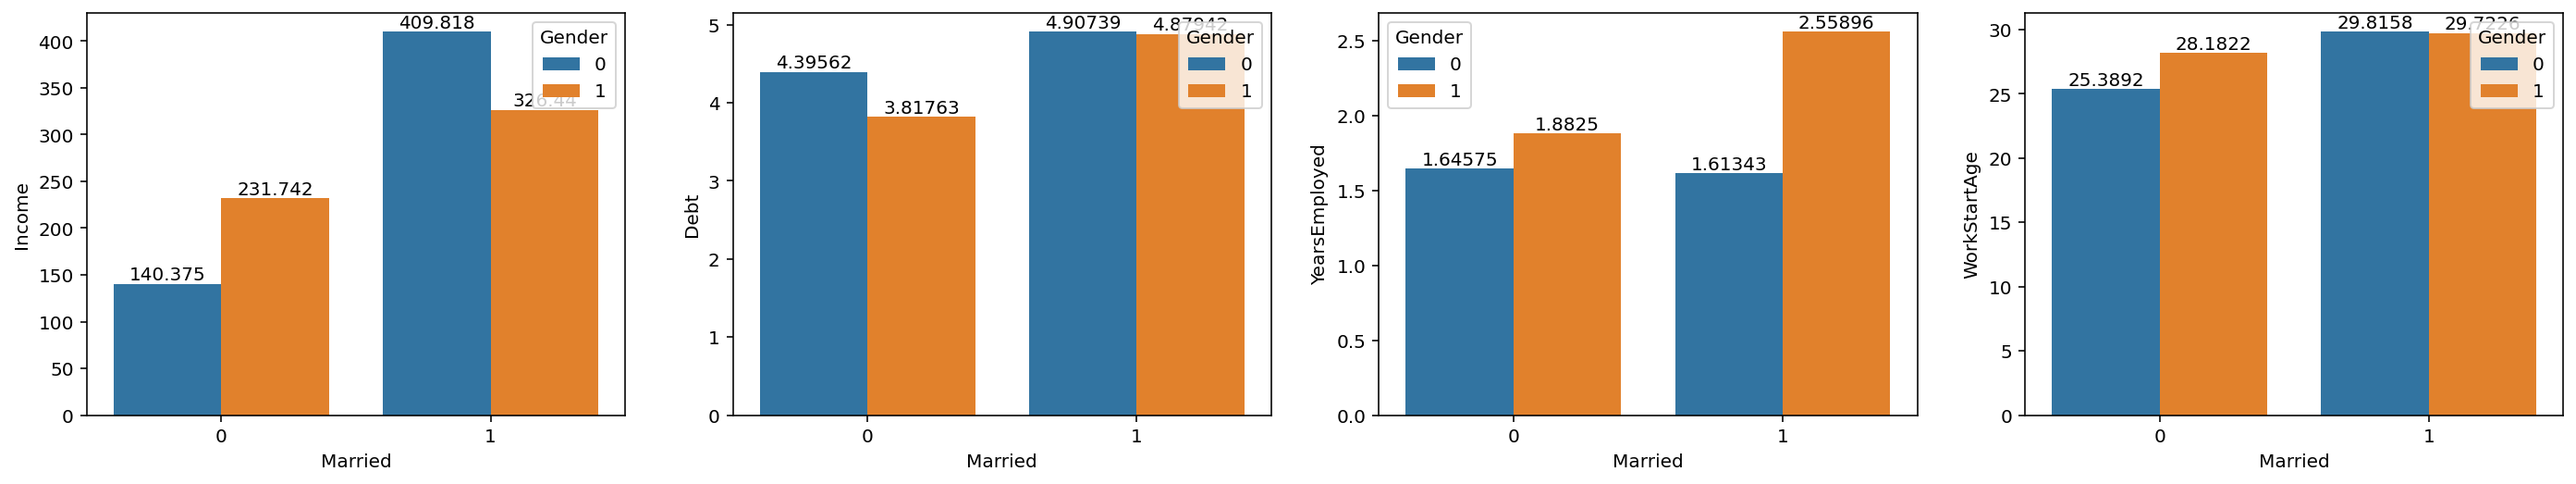

In [35]:
#Analise Grafica relacionando as colunas
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(24, 4))

sns.barplot(data=data_concat,x='Married',y='Income', hue='Gender',ci=None, ax=ax1)
sns.barplot(data=data_concat,x='Married',y='Debt', hue='Gender',ci=None, ax=ax2)
sns.barplot(data=data_concat,x='Married',y='YearsEmployed', hue='Gender',ci=None, ax=ax3)
sns.barplot(data=data_concat,x='Married',y='WorkStartAge', hue='Gender',ci=None, ax=ax4)

ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
ax2.bar_label(ax2.containers[0])
ax2.bar_label(ax2.containers[1])
ax3.bar_label(ax3.containers[0])
ax3.bar_label(ax3.containers[1])
ax4.bar_label(ax4.containers[0])
ax4.bar_label(ax4.containers[1])

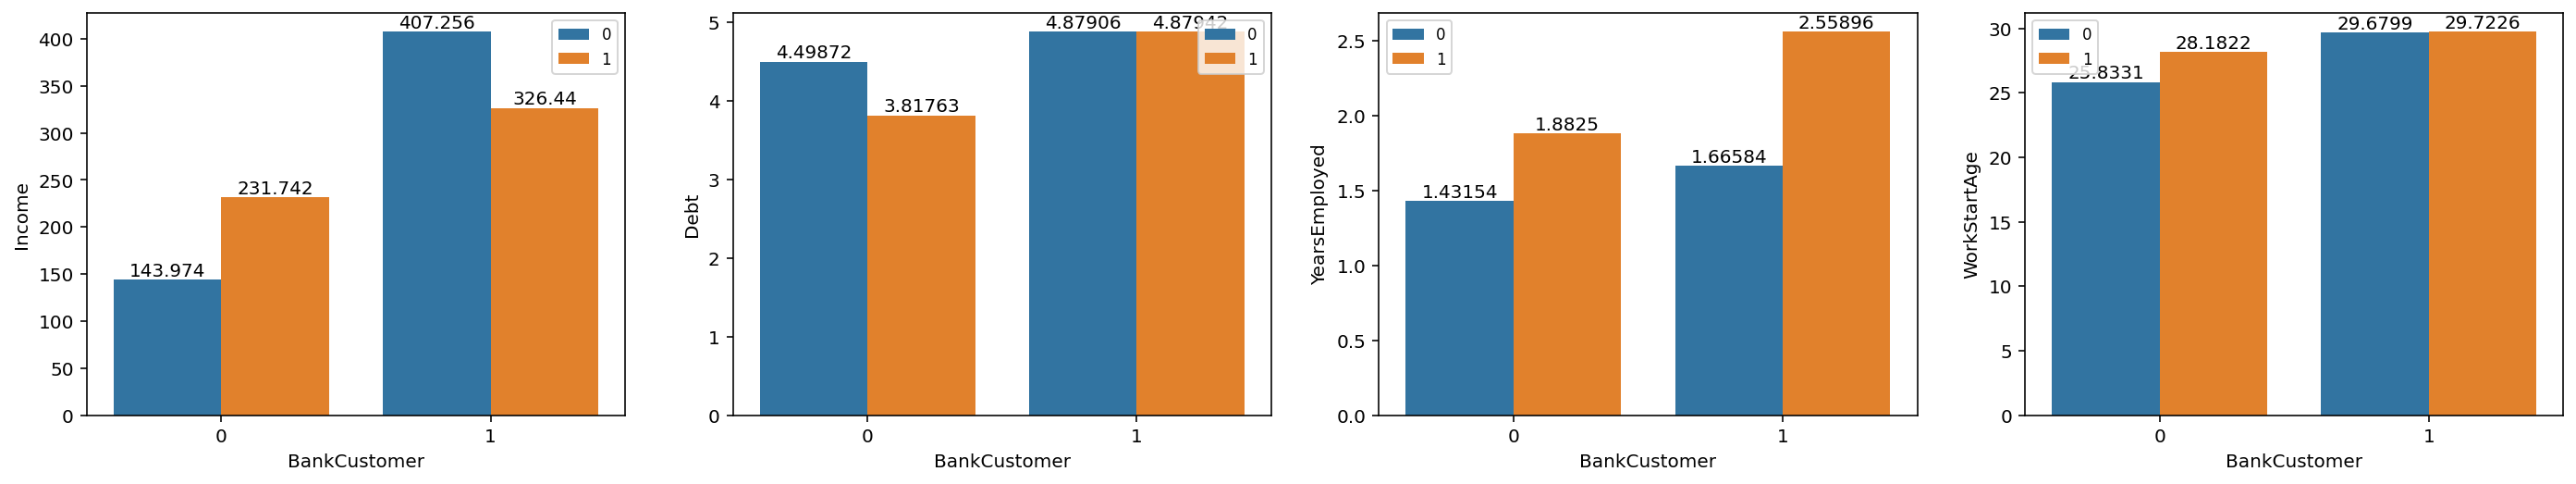

In [36]:
#Analise Grafica relacionando as colunas
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(24, 4))

sns.barplot(data=data_concat,x='BankCustomer',y='Income', hue='Gender',ci=None, ax=ax1)
sns.barplot(data=data_concat,x='BankCustomer',y='Debt', hue='Gender',ci=None, ax=ax2)
sns.barplot(data=data_concat,x='BankCustomer',y='YearsEmployed', hue='Gender',ci=None, ax=ax3)
sns.barplot(data=data_concat,x='BankCustomer',y='WorkStartAge', hue='Gender',ci=None, ax=ax4)

ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
ax2.bar_label(ax2.containers[0])
ax2.bar_label(ax2.containers[1])
ax3.bar_label(ax3.containers[0])
ax3.bar_label(ax3.containers[1])
ax4.bar_label(ax4.containers[0])
ax4.bar_label(ax4.containers[1])

ax1.legend(fontsize='small')
ax2.legend(fontsize='small')
ax3.legend(fontsize='small')
ax4.legend(fontsize='small')

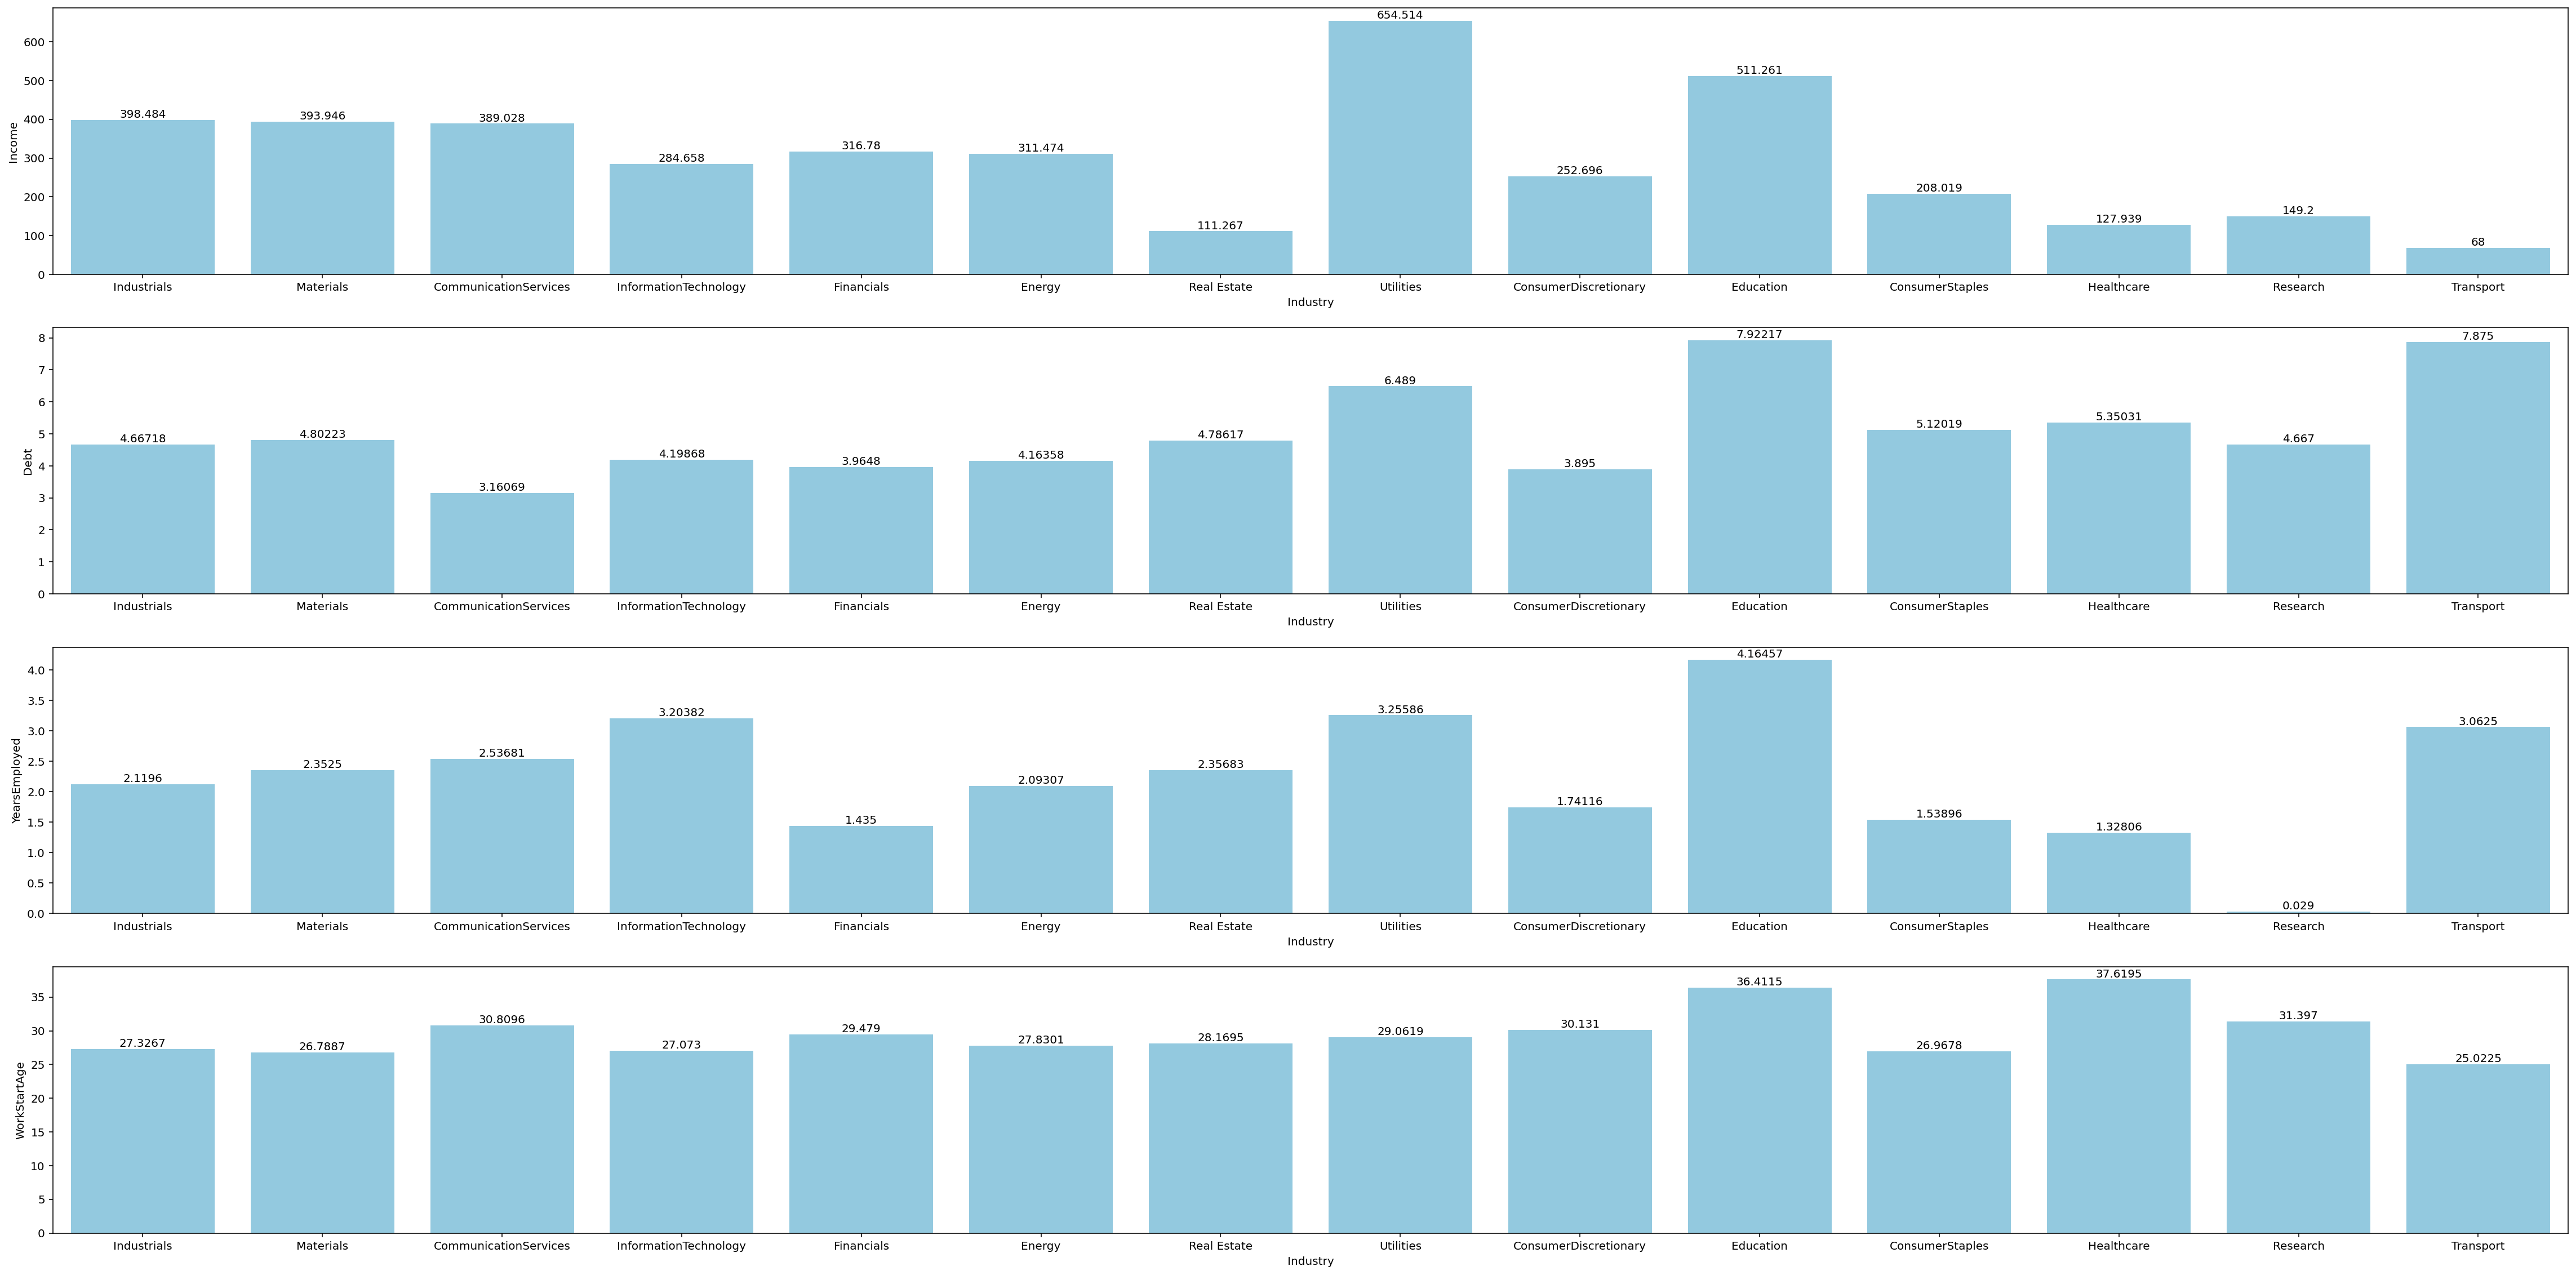

In [37]:
#Analise Grafica relacionando as colunas
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(40, 20))

sns.barplot(data=data,x='Industry',y='Income', ci=None, ax=ax1, color='skyblue')
sns.barplot(data=data,x='Industry',y='Debt', ci=None, ax=ax2, color='skyblue')
sns.barplot(data=data,x='Industry',y='YearsEmployed', ci=None, ax=ax3, color='skyblue')
sns.barplot(data=data,x='Industry',y='WorkStartAge', ci=None, ax=ax4, color='skyblue')

ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])
ax3.bar_label(ax3.containers[0])
ax4.bar_label(ax4.containers[0])
plt.show()

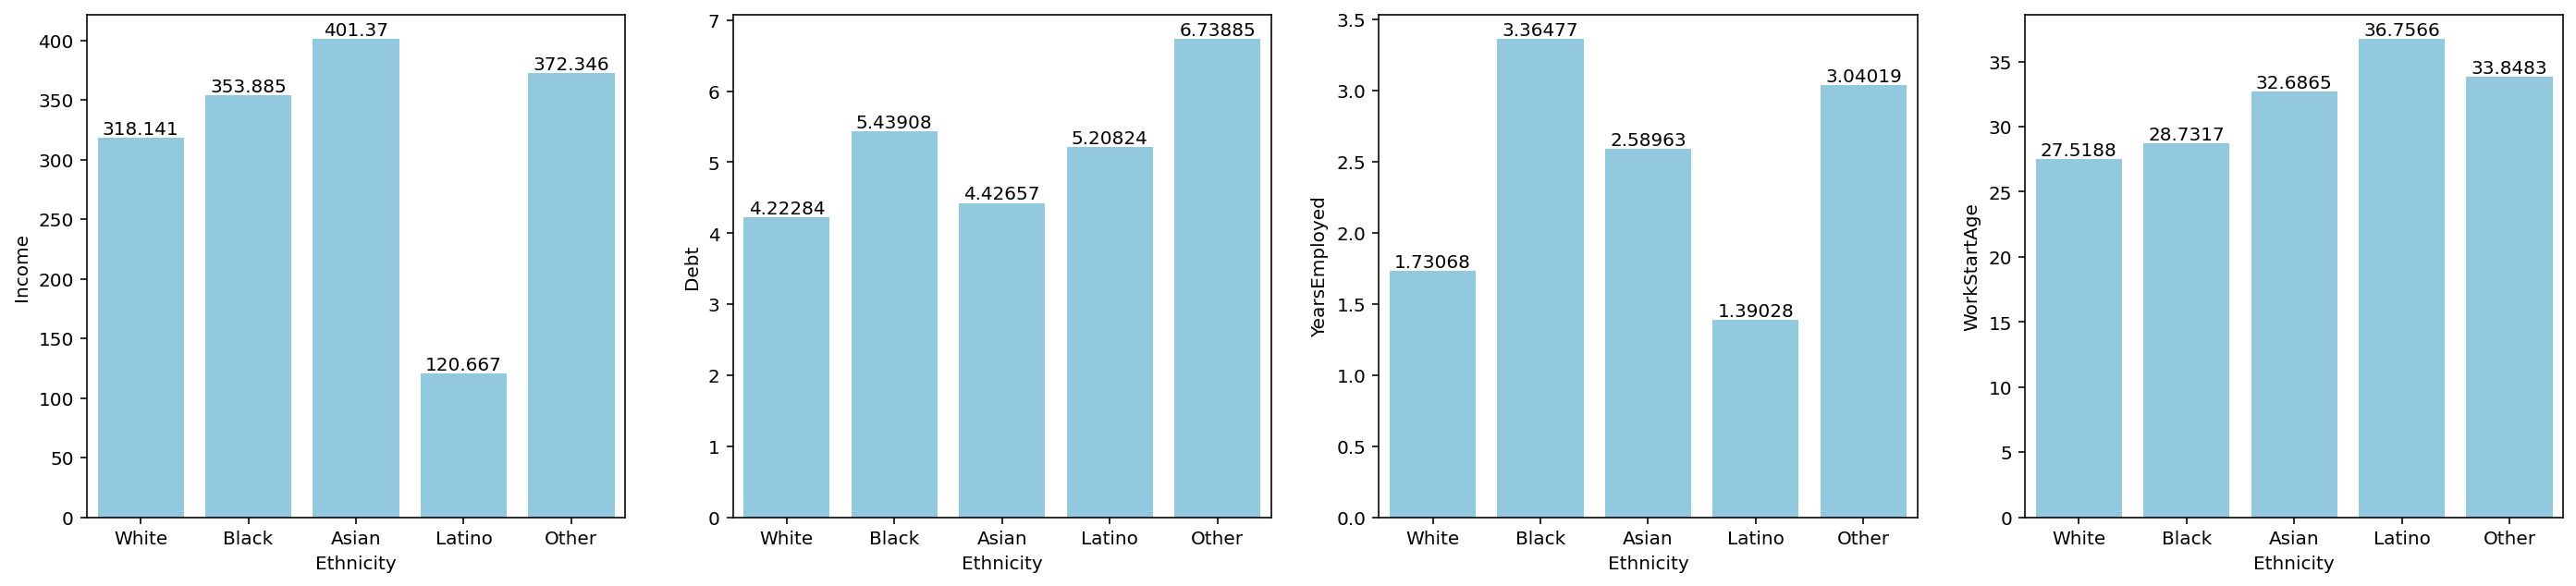

In [38]:
#Analise Grafica relacionando as colunas
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(24, 5))

sns.barplot(data=data,x='Ethnicity',y='Income', ci=None, ax=ax1, color='skyblue')
sns.barplot(data=data,x='Ethnicity',y='Debt', ci=None, ax=ax2, color='skyblue')
sns.barplot(data=data,x='Ethnicity',y='YearsEmployed', ci=None, ax=ax3, color='skyblue')
sns.barplot(data=data,x='Ethnicity',y='WorkStartAge', ci=None, ax=ax4, color='skyblue')

ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])
ax3.bar_label(ax3.containers[0])
ax4.bar_label(ax4.containers[0])
plt.show()

In [41]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

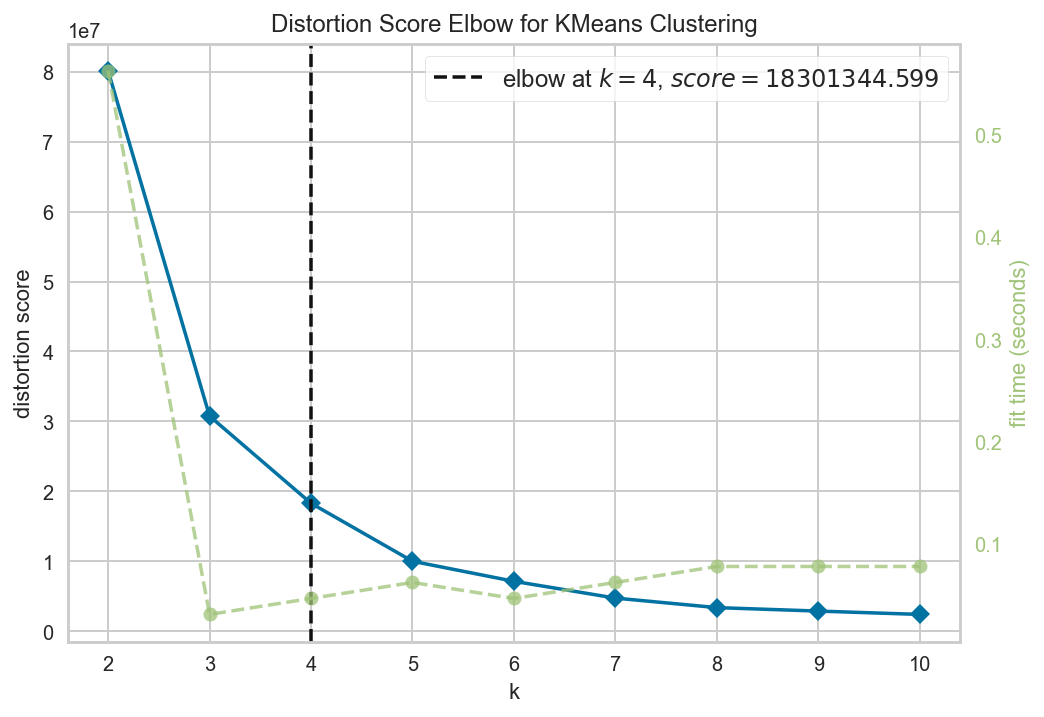

In [42]:
km = KMeans()
elbow = KElbowVisualizer(estimator = km, k = 10)
elbow.fit(data_concat)
elbow.show()

plt.show()

In [43]:
km = KMeans(n_clusters = 4, random_state = 808)
clusters = km.fit_predict(data_concat)

data_concat['kmeans_cluster'] = clusters

In [44]:
data_concat.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Income',
       'Approved', 'WorkStartAge', 'Industry', 'Ethnicity', 'Citizen',
       'kmeans_cluster'],
      dtype='object')

In [48]:
#Checando o fator de inflação da variaçao e o valor p
import statsmodels.api as sm
smodel=sm.OLS(data_concat['Approved'], data_concat[['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Income',
       'WorkStartAge', 'Industry', 'Ethnicity', 'Citizen', 'kmeans_cluster']])
res=smodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Approved   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.747
Method:                 Least Squares   F-statistic:                              129.8
Date:                Sun, 22 May 2022   Prob (F-statistic):                   1.36e-182
Time:                        09:36:54   Log-Likelihood:                         -188.93
No. Observations:                 655   AIC:                                      407.9
Df Residuals:                     640   BIC:                                      475.1
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Gender             0.0027      0.027      0.101      0.919      -0.050       0.055
Age                0.0029      0.002      1.941      0.053   -3.47e-05       0.006
Debt              -0.0020      0.003     -0.709      0.478      -0.008       0.004
Married           -0.7520      0.333     -2.255      0.024      -1.407      -0.097
BankCustomer       0.8150      0.334      2.443      0.015       0.160       1.470
YearsEmployed      0.0066      0.003      2.203      0.028       0.001       0.012
PriorDefault       0.5738      0.030     18.902      0.000       0.514       0.633
Employed           0.1197      0.034      3.552      0.000       0.054       0.186
CreditScore        0.0068      0.003      1.999      0.046       0.000       0.014
DriversLicense    -0.0368      0.026     -1.426      0.154      -0.088       0.014
Income           9.51e-05    2.1e-05      4.534      0.000    5.39e-05       0.000
WorkStartAge      -0.0037      0.002     -2.221      0.027      -0.007      -0.000
Industry           0.0117      0.004      3.220      0.001       0.005       0.019
Ethnicity         -0.0012      0.008     -0.152      0.879      -0.017       0.014
Citizen            0.1019      0.039      2.583      0.010       0.024       0.179
kmeans_cluster    -0.0598      0.024     -2.521      0.012      -0.106      -0.013
==============================================================================
Omnibus:                       24.081   Durbin-Watson:                   0.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.851
Skew:                          -0.123   Prob(JB):                     7.45e-13
Kurtosis:                       4.409   Cond. No.                     1.77e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.2e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({'Column name': column, 'VIF': variance_inflation_factor(smodel.exog, i)} 
             for i, column in enumerate(smodel.exog_names)
             if column != 'Intercept').sort_values(by='VIF', ascending=False)

C:\Users\erine\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Column name,VIF
1,Age,inf
5,YearsEmployed,inf
11,WorkStartAge,inf
4,BankCustomer,517.226611
3,Married,515.835954
15,kmeans_cluster,4.240408
13,Ethnicity,3.967802
12,Industry,3.392585
0,Gender,3.075680
7,Employed,2.886432


In [50]:
#Podemos ver 'inf' para o valor VIF e descobrir que, se houver variáveis independentes que tenham correlação linear quase perfeita, 'inf' será retornado.
#Para corrigir o problema encerramos uma das colunas que o causou (StartWorkingAge)
smodel2=sm.OLS(data_concat['Approved'], data_concat[['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Income',
       'Industry', 'Ethnicity', 'Citizen', 'kmeans_cluster']])
res=smodel2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Approved   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.747
Method:                 Least Squares   F-statistic:                              129.8
Date:                Sun, 22 May 2022   Prob (F-statistic):                   1.36e-182
Time:                        09:51:07   Log-Likelihood:                         -188.93
No. Observations:                 655   AIC:                                      407.9
Df Residuals:                     640   BIC:                                      475.1
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Gender             0.0027      0.027      0.101      0.919      -0.050       0.055
Age               -0.0007      0.001     -0.706      0.480      -0.003       0.001
Debt              -0.0020      0.003     -0.709      0.478      -0.008       0.004
Married           -0.7520      0.333     -2.255      0.024      -1.407      -0.097
BankCustomer       0.8150      0.334      2.443      0.015       0.160       1.470
YearsEmployed      0.0102      0.005      2.235      0.026       0.001       0.019
PriorDefault       0.5738      0.030     18.902      0.000       0.514       0.633
Employed           0.1197      0.034      3.552      0.000       0.054       0.186
CreditScore        0.0068      0.003      1.999      0.046       0.000       0.014
DriversLicense    -0.0368      0.026     -1.426      0.154      -0.088       0.014
Income           9.51e-05    2.1e-05      4.534      0.000    5.39e-05       0.000
Industry           0.0117      0.004      3.220      0.001       0.005       0.019
Ethnicity         -0.0012      0.008     -0.152      0.879      -0.017       0.014
Citizen            0.1019      0.039      2.583      0.010       0.024       0.179
kmeans_cluster    -0.0598      0.024     -2.521      0.012      -0.106      -0.013
==============================================================================
Omnibus:                       24.081   Durbin-Watson:                   0.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.851
Skew:                          -0.123   Prob(JB):                     7.45e-13
Kurtosis:                       4.409   Cond. No.                     2.80e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
pd.DataFrame({'Column name': column, 'VIF': variance_inflation_factor(smodel2.exog, i)} 
             for i, column in enumerate(smodel2.exog_names)
             if column != 'Intercept').sort_values(by='VIF', ascending=False)

,Column name,VIF
4,BankCustomer,517.226611
3,Married,515.835954
1,Age,7.200817
14,kmeans_cluster,4.240408
12,Ethnicity,3.967802
11,Industry,3.392585
0,Gender,3.075680
7,Employed,2.886432
6,PriorDefault,2.858655
2,Debt,2.269393


In [52]:
#Observa-se que as colunas abaixo tem um valor p abaixo de 0.05
#['Married', 'BankCustomer', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Income', 'Approved', 'work_start_age', 'Industry', 'Citizen', 'kmeans_cluster']
#e que as colunas abaixo tem um VIF abaixo de 10
#['Gender', 'Age', 'Debt', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Income', 'Approved', 'work_start_age', 'Industry', 'Ethnicity', 'Citizen', 'kmeans_cluster']

<AxesSubplot:xlabel='WorkStartAge'>

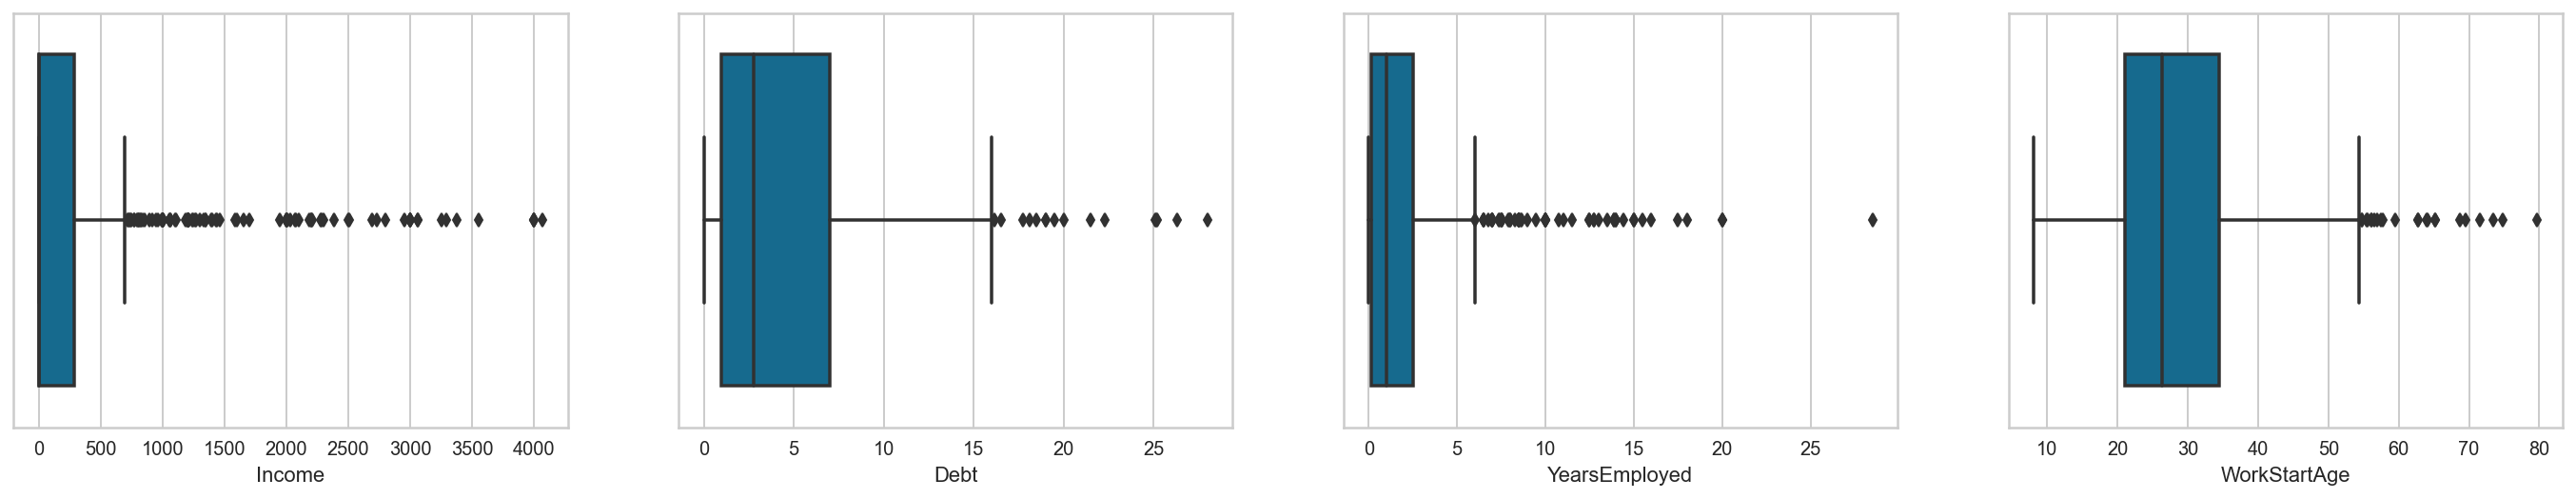

In [56]:
#Classificação antes de dimensionar
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(24, 4))

sns.boxplot(x=data_concat['Income'],ax=ax1)
sns.boxplot(x=data_concat['Debt'],ax=ax2)
sns.boxplot(x=data_concat['YearsEmployed'],ax=ax3)
sns.boxplot(x=data_concat['WorkStartAge'],ax=ax4)

In [57]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

X=data_concat.drop(columns=['Approved'])
y=data_concat['Approved']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)

In [61]:
dtc = DecisionTreeClassifier(random_state=808)

model = dtc.fit(X_train, y_train)
pred = model.predict(X_test)

print ('Accuracy_score: ', metrics.accuracy_score(y_test, pred)*100)

Accuracy_score:  75.63451776649747


In [62]:
#Classificação após descartar colunas problemáticas (p-value, VIF) e dimensionamento
robust = RobustScaler()

train_robust = X_train[['Income','Debt','YearsEmployed']]

X_train_scaled = robust.fit_transform(train_robust)

X_train_scaled=pd.DataFrame(X_train_scaled,columns=['Income','Debt','YearsEmployed'])

X_train_scaled

,Income,Debt,YearsEmployed
0,7.653333,0.823215,2.997859
1,1.653333,0.651986,1.070664
2,0.020000,-0.047746,-0.374732
3,-0.010000,-0.349866,-0.357602
4,-0.013333,-0.397613,-0.357602
...,...,...,...
453,-0.013333,-0.335872,0.197002
454,0.453333,-0.356452,-0.304069
455,-0.013333,-0.294711,-0.214133
456,2.393333,-0.404198,-0.411135


In [63]:
X_train_cate=X_train[['PriorDefault', 'Employed', 'CreditScore',\
                      'DriversLicense', 'Industry', 'Citizen', 'kmeans_cluster']]

X_train_scaled.reset_index(drop = True, inplace=True)
X_train_cate.reset_index(drop = True, inplace=True)

X_train_scaled_concat = pd.concat([X_train_scaled,X_train_cate], axis = 1)
X_train_scaled_concat.head()

,Income,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Industry,Citizen,kmeans_cluster
0,7.653333,0.823215,2.997859,1,1,14,0,9,0,3
1,1.653333,0.651986,1.070664,1,1,1,0,2,0,0
2,0.020000,-0.047746,-0.374732,0,0,0,0,1,0,1
3,-0.010000,-0.349866,-0.357602,0,1,1,0,4,0,1
4,-0.013333,-0.397613,-0.357602,0,0,0,0,4,0,1


In [64]:
test_robust = X_test[['Income','Debt','YearsEmployed']]
X_test_scaled = robust.transform(test_robust)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=['Income','Debt','YearsEmployed'])
X_test_scaled.head()

,Income,Debt,YearsEmployed
0,0.220000,-0.397613,-0.374732
1,0.056667,0.034575,-0.143469
2,-0.013333,-0.212389,-0.428266
3,-0.013333,-0.288125,-0.143469
4,0.806667,-0.006586,-0.338330


In [65]:
X_test_cate=X_test[['PriorDefault', 'Employed', 'CreditScore',\
                      'DriversLicense', 'Industry', 'Citizen', 'kmeans_cluster']]

X_test_scaled.reset_index(drop = True, inplace=True)
X_test_cate.reset_index(drop = True, inplace=True)

X_test_scaled_concat = pd.concat([X_test_scaled,X_test_cate], axis = 1)
X_test_scaled_concat.head()

,Income,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Industry,Citizen,kmeans_cluster
0,0.220000,-0.397613,-0.374732,0,0,0,0,5,0,1
1,0.056667,0.034575,-0.143469,0,1,1,0,2,0,1
2,-0.013333,-0.212389,-0.428266,0,0,0,0,4,0,1
3,-0.013333,-0.288125,-0.143469,0,0,0,0,8,0,1
4,0.806667,-0.006586,-0.338330,0,0,0,0,1,0,1


In [66]:
#Observa-se que a pontuação de precisão aumentou 75 -> 80 após a seleção e o dimensionamento do recurso
dtc = DecisionTreeClassifier(random_state=808)

model = dtc.fit(X_train_scaled_concat, y_train)
pred = model.predict(X_test_scaled_concat)


print ('Accuracy_score: ', metrics.accuracy_score(y_test, pred)*100)

Accuracy_score:  80.71065989847716
